In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt



# Er der forskel??

In [3]:
import math
from scipy.stats import norm

# Data
p1 = 3 / 10  # Proportion for gruppe 1
p2 = 9 / 10  # Proportion for gruppe 2
n1 = 10  # Antal observationer i gruppe 1
n2 = 10  # Antal observationer i gruppe 2

# Beregn den samlede proportion
P = (p1 * n1 + p2 * n2) / (n1 + n2)

# Beregn standardfejlen for forskellen
SE = math.sqrt(P * (1 - P) * (1/n1 + 1/n2))

# Beregn Z-værdi
Z = (p1 - p2) / SE

# Beregn p-værdi (for 2-sidet test)
p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Z-værdi: {Z}")
print(f"P-værdi: {p_value}")

# Tjek om p-værdien er signifikant (f.eks. 0.05 niveau)
if p_value < 0.05:
    print("Forskellen er signifikant.")
else:
    print("Forskellen er ikke signifikant.")


Z-værdi: -2.738612787525831
P-værdi: 0.0061698993205441255
Forskellen er signifikant.


In [4]:
import math
from scipy.stats import norm

# Data
p1 = 10 / 10  # Proportion for gruppe 1
p2 = 9 / 10  # Proportion for gruppe 2
n1 = 10  # Antal observationer i gruppe 1
n2 = 10  # Antal observationer i gruppe 2

# Beregn den samlede proportion
P = (p1 * n1 + p2 * n2) / (n1 + n2)

# Beregn standardfejlen for forskellen
SE = math.sqrt(P * (1 - P) * (1/n1 + 1/n2))

# Beregn Z-værdi
Z = (p1 - p2) / SE

# Beregn p-værdi (for 2-sidet test)
p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Z-værdi: {Z}")
print(f"P-værdi: {p_value}")

# Tjek om p-værdien er signifikant (f.eks. 0.05 niveau)
if p_value < 0.05:
    print("Forskellen er signifikant.")
else:
    print("Forskellen er ikke signifikant.")

Z-værdi: 1.0259783520851535
P-værdi: 0.30490178817878855
Forskellen er ikke signifikant.


# Ens Varians

In [32]:
from scipy.stats import levene

# Eksempeldata
data1 = [593, 
    465, 
    529, 
    535, 
    532, 
    540, 
    560, 
    514, 
    484 
]
data2 = [404, 
    466, 
    449, 
    421, 
    405, 
    428, 
    474, 
    448, 
    464
]

# Levene's test
stat, p_value = levene(data1, data2)
print(f"Levene's test: stat={stat:.3f}, p-value={p_value:.3f}")

# Fortolkning
if p_value < 0.05:
    print("Variansen er signifikant forskellig (brug Welch's t-test).")
else:
    print("Variansen er ikke signifikant forskellig (almindelig t-test kan bruges).")


Levene's test: stat=0.200, p-value=0.661
Variansen er ikke signifikant forskellig (almindelig t-test kan bruges).


# SIMULATION

In [102]:
import numpy as np
import scipy.stats as stats

np.random.seed(0)
# Antal gentagelser i simuleringen
n_simulations = 100000

# Simulerede stikprøvestørrelser
n = 10  # 10 observationer i hver gruppe

# Succesrater for de to scenarier
# Nullhypotesen (H₀) - ingen forskel: begge grupper har succesrate 0.6
p_h0_group1 = 0.6
p_h0_group2 = 0.6

# Alternativhypotesen (H₁) - der er forskel: gruppe 1 har succesrate 0.3, gruppe 2 har 0.9
p_h1_group1 = 0.3
p_h1_group2 = 0.9

# Simuler for begge scenarier
def simulate_data(p_group1, p_group2, n, n_simulations):
    # Simuler binære data for begge grupper
    group1_successes = np.random.binomial(n, p_group1, n_simulations)
    group2_successes = np.random.binomial(n, p_group2, n_simulations)
    
    return group1_successes, group2_successes

# Simulere data for H₀ (nullhypotese) og H₁ (alternativhypotese)
group1_h0, group2_h0 = simulate_data(p_h0_group1, p_h0_group2, n, n_simulations)
group1_h1, group2_h1 = simulate_data(p_h1_group1, p_h1_group2, n, n_simulations)

# Udskriv eksempel på de første 5 simuleringer for begge scenarier
print("Eksempel på simuleringer for H₀:")
print("Gruppe 1 (H₀):", group1_h0[:10])
print("Gruppe 2 (H₀):", group2_h0[:10])

print("\nEksempel på simuleringer for H₁:")
print("Gruppe 1 (H₁):", group1_h1[:10])
print("Gruppe 2 (H₁):", group2_h1[:10], '\n')

def calculate_p_value(group1, group2, n):
    # Beregn succesraterne for begge grupper
    # hvor mange fik de i gennemsnit i hver gruppe
    p1_hat = group1 / n
    p2_hat = group2 / n
    
    # Samlet succesrate, altså hvad fik de i alt i gennemsnit
    p_pool = (group1 + group2) / (2 * n)
    
    # Standardfejl også kalde SE
    se = np.sqrt(p_pool * (1 - p_pool) * (2 / n))
    
    # Hvis standardfejl er 0, returner p-værdi 1 (indikerer ingen forskel) 
    # For at undgå division med 0 hvilket kommer til at skabe fejl
    if se == 0:
        return 1
    
    # Z-score
    z = (p1_hat - p2_hat) / se
    
    # P-værdi (to-sidet test)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))  # To-sidet test
    return p_value

# Beregn p-værdier for simuleringerne
p_values_h0 = np.array([calculate_p_value(group1_h0[i], group2_h0[i], n) for i in range(n_simulations)])
p_values_h1 = np.array([calculate_p_value(group1_h1[i], group2_h1[i], n) for i in range(n_simulations)])

# Udskriv de første 10 p-værdier som eksempel
print("P-værdier for H₀ (nullhypotese):", p_values_h0[:10])
print("P-værdier for H₁ (alternativhypotese):", p_values_h1[:10])

# Signifikansniveau
alpha = 0.05

# Beregn Type I-fejl (sandsynligheden for at afvise H₀, når H₀ er sand)
# Tjekker hvor mange gange vi har afvist H0, altså hvor mange gange p-værdien på de grupper der har ens succesrate er under 0.05
type_I_error = np.mean(p_values_h0 < alpha)

# Udskriv Type I-fejlsandsynligheden
# print('\n', f"Sandsynligheden for Type I-fejl (H₀ afvist, H₀ er sand): {type_I_error:.4f}")


# Add this function to calculate Type II error

def calculate_type_II_error(p_values, alpha):
    # Count how many times the null hypothesis is NOT rejected 
    # when it should be rejected (i.e., when the alternative hypothesis is true)
    type_II_errors = np.mean(p_values >= alpha)
    return type_II_errors

# Calculate Type I and Type II errors
alpha = 0.05

# Type I error (probability of falsely rejecting H0 when H0 is true)
# Tjekker hvor mange gange vi har accepteret H0 hvor H1 var sand, altså hvor mange gange p-værdien på de grupper der har ens succesrate er under 0.05
type_I_error = np.mean(p_values_h0 < alpha)

# Type II error (probability of failing to reject H0 when H1 is true)
type_II_error = calculate_type_II_error(p_values_h1, alpha)

# Print results
print(f"Sandsynligheden for Type I-fejl (H₀ afvist, H₀ er sand): {type_I_error:.4f}")
print(f"Sandsynligheden for Type II-fejl (H₀ accepteret, H₁ er sand): {type_II_error:.4f}")



Eksempel på simuleringer for H₀:
Gruppe 1 (H₀): [6 5 6 6 6 5 6 4 3 6]
Gruppe 2 (H₀): [6 4 6 8 6 5 7 8 8 5]

Eksempel på simuleringer for H₁:
Gruppe 1 (H₁): [2 3 6 5 2 3 3 2 5 3]
Gruppe 2 (H₁): [ 8 10  6 10 10  9 10  9 10 10] 

P-værdier for H₀ (nullhypotese): [1.         0.65309511 1.         0.32911399 1.         1.
 0.63920743 0.06788915 0.02461876 0.65309511]
P-værdier for H₁ (alternativhypotese): [7.29035809e-03 1.03201392e-03 1.00000000e+00 9.82327451e-03
 2.60729633e-04 6.16989932e-03 1.03201392e-03 1.65369516e-03
 9.82327451e-03 1.03201392e-03]
Sandsynligheden for Type I-fejl (H₀ afvist, H₀ er sand): 0.0397
Sandsynligheden for Type II-fejl (H₀ accepteret, H₁ er sand): 0.1747


type I      |  er chancen for at konkludere der er en forskel selvom der ikke er en
1 - type I  |  er chancen for ikke at konkludere en forskel når der heller ikke er en

#########################################################################################

type II     |  er chancen for ikke at identificere en forskel når der er en
1 - type II |  er chancen for correct at identificere en forskel på de to

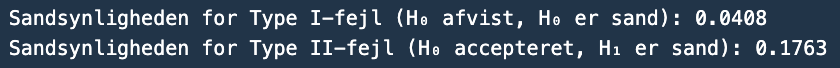

Ikke Vigtig:

In [ ]:
import math
import scipy.stats as stats

# Parametre

Z = stats.norm.ppf(0.95)  # Z-værdi for 95% konfidensinterval
# Z = 1.96  # Z-værdi for 95% konfidensinterval
p1 = 3 / 10  # Proportion for gruppe 1
p2 = 9 / 10  # Proportion for gruppe 2
E = 0.1  # Ønsket fejlmargin (5%)

# Beregn stikprøvestørrelse
n = (Z**2 * (p1 * (1 - p1) + p2 * (1 - p2))) / (E**2)
n = math.ceil(n)  # Rund op til nærmeste heltal
print(f"Den nødvendige stikprøvestørrelse for at sammenligne de to proportioner er {n}")


Den nødvendige stikprøvestørrelse for at sammenligne de to proportioner er 82
